# 📱 **¿Cuál es la mejor tarifa?**
---

## **Introducción**


Megaline es un operador de telecomunicaciones que ofrece a sus clientes dos tarifas de prepago: Surf y Ultimate. Actualmente, el departamento comercial busca identificar cuál de estas tarifas resulta más rentable, con el objetivo de optimizar la asignación del presupuesto publicitario.

Como parte de este análisis, se cuenta con un conjunto de datos preliminar que incluye información de 500 clientes. Estos registros contienen detalles sobre los usuarios, su lugar de residencia, la tarifa contratada y el uso de servicios durante 2018, incluyendo llamadas realizadas y mensajes de texto enviados.

A partir de esta información, se analizará el comportamiento de los clientes y se evaluará cuál de las dos tarifas genera mayores ingresos para la empresa, proporcionando así una base sólida para la toma de decisiones estratégicas.

### 🎯**Objetivo**

El objetivo de este proyecto es determinar cuál de las dos tarifas de prepago genera mayores ingresos para Megaline, con el fin de orientar de manera más eficiente el presupuesto destinado a publicidad.

Para alcanzar esta meta, se llevará a cabo un análisis estructurado que incluye las siguientes etapas clave:

- **Carga y exploración de los datos:** familiarización con la estructura y contenido del conjunto de datos.

- **Limpieza de datos:** detección y corrección de errores como valores ausentes o duplicados.

- **Ingeniería de características:** enriquecimiento del dataset mediante la creación de nuevas variables a partir de la información existente.

- **Análisis exploratorio:** estudio del comportamiento de los usuarios según el tipo de tarifa.

- **Pruebas de hipótesis estadísticas:** formulación y validación de suposiciones sobre las diferencias entre planes.

- **Conclusión:** identificación del plan más rentable para la empresa.

Este enfoque permitirá a Megaline tomar decisiones basadas en datos, optimizando sus estrategias comerciales y de marketing.



## ⏯️**Inicialización**
---

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Carga los archivos de datos en diferentes DataFrames
local = 'datasets/'
# Modificar variable de deacuerdo a plataforma
users = pd.read_csv(local + 'megaline_users.csv')
calls = pd.read_csv(local + 'megaline_calls.csv')
messages = pd.read_csv(local + 'megaline_messages.csv')
internet = pd.read_csv(local + 'megaline_internet.csv')
plans = pd.read_csv(local + 'megaline_plans.csv')

## 🛠️**Preparar los datos**
---

### 🧾 **Dataframe `plans` (Tarifas)**

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print(plans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes
None


In [4]:
# Imprime una muestra de los datos para las tarifas
display(plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


>**Observaciones:**
>
>- Se observa que la tabla de planes o tarifas, no contiene valores nulos o duplicados, es una tabla con solo 2 registros (uno para cada plan).
>
>- En primer lugar, considero que la columna `plan_name` debería ser la primera en presentarse para facilitar la lectura y entendimiento de la tabla.
>
>- Además, las columnas que tratan con datos de moneda como `usd_monthly_pay` y `usd_per_gb` deberían ser del tipo float para mantener homogeneidad con las columnas `usd_per_message` y `usd_per_minute`.
>
>- La columna `mb_per_month_included` podría reducir su nombre a solo `mb_included` ya que todo es mensual.

##### Corregir datos

In [5]:
# Re-ordenando columnas
plans = plans[['plan_name', 'usd_monthly_pay', 'messages_included', 'mb_per_month_included', 'minutes_included', 'usd_per_message', 'usd_per_gb', 'usd_per_minute']]
# Cambiando tipo de dato a Float
plans[['usd_monthly_pay', 'usd_per_gb']] = plans[['usd_monthly_pay', 'usd_per_gb']].astype('float')

In [6]:
# Renombrando columna
plans.rename(columns={'mb_per_month_included':'mb_included'}, inplace=True)

print(plans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   usd_monthly_pay    2 non-null      float64
 2   messages_included  2 non-null      int64  
 3   mb_included        2 non-null      int64  
 4   minutes_included   2 non-null      int64  
 5   usd_per_message    2 non-null      float64
 6   usd_per_gb         2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(4), int64(3), object(1)
memory usage: 260.0+ bytes
None


### 🧾 **Dataframe `users` (Usuarios/as)** 


In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [8]:
# Imprime una muestra de datos para usuarios
display(users.sample(5))

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
236,1236,Odell,Juarez,74,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-04-04,ultimate,NaN
443,1443,Genaro,Quinn,58,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-03-11,surf,NaN
145,1145,Venice,Brooks,29,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-12,surf,NaN
484,1484,Delpha,Baldwin,46,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
483,1483,Miguel,Farrell,35,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-04-25,surf,NaN


>**Observaciones:**
>
>Se observa que la tabla consta de 8 columnas, que en su mayoría no presentan valores ausentes. El único caso en el que si se presentan datos auséntes es la columna `churn_date`, en donde cada valor `NaN` significa que el usuario sigue activo en la plataforma.
>
>- La columna `user_id` debe cambiar del tipo de `int` a `object`.
>
>- Las columnas `reg_date` y `churn_date` deben cambiar del tipo `object` a `datetime`.
>
>- Las columnas `first_name` y `last_name` se pueden fusionar para contar con un dataset mas óptimo, no tiene caso que estén separados.
>
>- La columna `plan` puede ir después de `user_id` para mejor lectura y entendimiento de la tabla.
>
>- Cambiar el nombre de la columna `plan` por `plan_name` para conservar homogeneidad entre tablas.


##### Corregir los datos

In [9]:
# Cambiando tipo de dato en columna 'user_id'
users['user_id'] = users['user_id'].astype('object')

# Cambiando tipo de dato en columnas 'reg_date' y 'churn_date'
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [10]:
# Fusionando 'first_name' y 'last_name'
users['first_name'] = users['first_name'] + ' ' + users['last_name']
# Renombrando columna a 'full_name'
users.rename(columns={'first_name':'full_name'}, inplace=True)
# Eliminando columna 'last_name'
users = users.drop('last_name', axis=1)

In [11]:
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   full_name   500 non-null    object        
 2   age         500 non-null    int64         
 3   city        500 non-null    object        
 4   reg_date    500 non-null    datetime64[ns]
 5   plan        500 non-null    object        
 6   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 27.5+ KB
None


##### Enriquecer los datos

In [12]:
# Separar la columna de 'city'
users[['city', 'zone']] = users['city'].str.split(',', expand=True)

In [13]:
#Re-ordenar columnas
users = users[['user_id', 'plan', 'full_name', 'age', 'city', 'zone', 'reg_date','churn_date']]
# Eliminar espacios
users['zone'] = users['zone'].str.strip()

In [14]:
# Cambiando nombre de la columna 'plan' a 'plan_name'
users.rename(columns={'plan':'plan_name'}, inplace=True)
display(users.head())

,user_id,plan_name,full_name,age,city,zone,reg_date,churn_date
0,1000,ultimate,Anamaria Bauer,45,Atlanta-Sandy Springs-Roswell,GA MSA,2018-12-24,NaT
1,1001,surf,Mickey Wilkerson,28,Seattle-Tacoma-Bellevue,WA MSA,2018-08-13,NaT
2,1002,surf,Carlee Hoffman,36,Las Vegas-Henderson-Paradise,NV MSA,2018-10-21,NaT
3,1003,surf,Reynaldo Jenkins,52,Tulsa,OK MSA,2018-01-28,NaT
4,1004,surf,Leonila Thompson,40,Seattle-Tacoma-Bellevue,WA MSA,2018-05-23,NaT


### 🧾 **Dataframe `calls` (Llamadas)** 

In [15]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print(calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [16]:
# Imprime una muestra de datos para las llamadas
display(calls.sample(5))

,id,user_id,call_date,duration
129013,1465_189,1465,2018-08-19,2.61
128840,1464_474,1464,2018-11-13,0.30
96541,1343_235,1343,2018-10-21,9.09
47242,1171_273,1171,2018-02-04,8.64
102540,1363_153,1363,2018-09-20,9.00


>**Observaciones:**
>
>- No existen datos ausentes en la tabla `calls`.
>
>- El id de la llamada relacionado con el id del usuario que realizó la llamada de acuerdo al siguiente formato: `userId_callId.`

>**Correcciones:**
>
>- La columna `user_id` es de tipo `int` y debe cambiarse a tipo `object`
>
>- La columna `call_date` es de tipo `object` y debe ser cambiado a tipo `datetime`.
>
>- De acuerdo con las instrucciones, los valores de la columna `duration` deben ser redondeados hacia arriba. Debido a que "Para las llamadas, cada llamada individual se redondea: incluso si la llamada duró solo un segundo, se contará como un minuto".
>
>- La columna `id` almacena el id propio de cada llamada,se puede renombrar la columna a `call_id` para ser mas claro.

##### Corregir los datos

In [17]:
# Cambiando tipo de dato en la columna 'call_date'
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.head()

# Cambiando tipo de dato en la columna 'user_id'
calls['user_id'] = calls['user_id'].astype('object')

##### Enriquecer los datos

In [18]:
# Redondeando duración de las llamadas
calls['duration'] = calls['duration'].apply(np.ceil)
# Convirtiendo la columna 'duration' en tipo int
calls['duration'] = calls['duration'].astype('int')

In [19]:
# Cambiando el nombre la columna 'id' a 'call_id'
calls.rename(columns={'id':'call_id'},inplace=True)

print(calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   call_id    137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 4.2+ MB
None


### 🧾 **Dataframe `messages` (Mensajes)**

In [20]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print(messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [21]:
# Imprime una muestra de datos para los mensajes
display(messages.sample(5))

,id,user_id,message_date
53213,1339_347,1339,2018-09-24
70394,1458_23,1458,2018-10-07
26408,1159_411,1159,2018-08-25
22420,1133_565,1133,2018-08-27
50002,1328_960,1328,2018-08-15


>**Observaciones:**
>
>- No existen valores ausentes ni duplicados
>
>- La columna `user_id` es del tipo `int` y debe cambiar a tipo `object`.
>
>- La columna `message_date` es del tipo `object` y debe cambiar a tipo `datetime`.
>
>- La columna `id` hace referencia al id único para cada mensaje, por esto se puede cambiar el nombre a `message_id`.

##### Corregir los datos

In [22]:
# Cambiando 'user_id' de tipo de dato 'int' a 'object'
messages['user_id'] = messages['user_id'].astype('object')

In [23]:
# Cambiando 'message_date' de tipo de dato 'object' a 'TimeStamp'
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

##### Enriquecer los datos

In [24]:
# Cambiando nombre de la columna 'id' a 'message_id'
messages.rename(columns={'id':'message_id'}, inplace=True)
print(messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   message_id    76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB
None


### 🧾 **Dataframe `internet` (Internet)**

In [25]:
# Imprime la información general/resumida sobre el DataFrame de internet
print(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [26]:
# Imprime una muestra de datos para el tráfico de internet
display(internet.sample(5))

,id,user_id,session_date,mb_used
96064,1448_382,1448,2018-11-01,237.29
92315,1431_2,1431,2018-12-12,203.48
4003,1022_414,1022,2018-10-02,0.00
74523,1351_9,1351,2018-11-27,0.00
72750,1338_152,1338,2018-12-25,461.36


>**Observaciones:**
>
>- No existen datos ausentes ni duplicados.
>
>- La columna `user_id` es del tipo `int` y debe cambiar a tipo `object`.
>
>- La columna `session_date` es del tipo `object` y debe cambiar a tipo `datetime`.
>
>- La columna `id` hace referencia al id único para cada sesión de navegación en la web, por esto se puede cambiar el nombre a `session_id`.


##### Corregir los datos

In [27]:
# Cambiando la columna 'user_id' de tipo 'int' a 'object'
internet['user_id'] = internet['user_id'].astype('object')

In [28]:
# Cambiando la columna 'session_date' de tipo 'object' a 'TimeStamp'
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

##### Enriquecer los datos

In [29]:
# Cambiando nombre a la columna 'id' por 'session_id'
internet.rename(columns={'id':'session_id'}, inplace=True)

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   session_id    104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB


### 🔎**Estudiar las condiciones de las tarifas**


In [30]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
display(plans)

,plan_name,usd_monthly_pay,messages_included,mb_included,minutes_included,usd_per_message,usd_per_gb,usd_per_minute
0,surf,20.0,50,15360,500,0.03,10.0,0.03
1,ultimate,70.0,1000,30720,3000,0.01,7.0,0.01


## 🧩**Agregar datos por usuario**
---

### **Cálculo de actividad al mes por usuario**

In [31]:
# Agrega una columna 'month' a cada DataFrame
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month

# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_by_user = (
    calls
    .groupby(by=['user_id', 'month'])
    .agg(calls_used = ('call_id','count'))
    .reset_index()
)

# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_by_user = (
    calls
    .groupby(by=['user_id', 'month'])
    .agg(min_used = ('duration','sum'))
    .reset_index()
)

# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_by_user = (
    messages
    .groupby(by=['user_id', 'month'])
    .agg(messages_used=('message_id','count'))
    .reset_index()
)

# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
mb_by_user = (
    internet
    .groupby(by=['user_id', 'month'])
    .agg({'mb_used':'sum'})
    .reset_index()
)

>A continuación, se unirán los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.

In [32]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
user_monthly_summary = (
    calls_by_user
    .merge(minutes_by_user, on=['user_id','month'], how='left')
    .merge(messages_by_user, on=['user_id','month'], how='left')
    .merge(mb_by_user, on=['user_id','month'], how='left')
)

In [33]:
# Añade la información de la tarifa
user_monthly_summary = (
    users[['user_id', 'plan_name']]
    .merge(user_monthly_summary, on='user_id', how='left')
    .merge(plans, on='plan_name', how='left')
)


In [34]:
# Mostrando resumen de dataframe resultante
user_monthly_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            2277 non-null   object 
 1   plan_name          2277 non-null   object 
 2   month              2258 non-null   float64
 3   calls_used         2258 non-null   float64
 4   min_used           2258 non-null   float64
 5   messages_used      1773 non-null   float64
 6   mb_used            2243 non-null   float64
 7   usd_monthly_pay    2277 non-null   float64
 8   messages_included  2277 non-null   int64  
 9   mb_included        2277 non-null   int64  
 10  minutes_included   2277 non-null   int64  
 11  usd_per_message    2277 non-null   float64
 12  usd_per_gb         2277 non-null   float64
 13  usd_per_minute     2277 non-null   float64
dtypes: float64(9), int64(3), object(2)
memory usage: 249.2+ KB


>**Observaciones:**
>
>- Existen datos ausentes en las columnas: `month`, `calls_used`, `min_used`, `messages_used` y `mb_used`.

In [35]:
# Manejando valores ausente resultantes de merge en columna 'month'
user_monthly_summary.query('month.isna()')

,user_id,plan_name,month,calls_used,min_used,messages_used,mb_used,usd_monthly_pay,messages_included,mb_included,minutes_included,usd_per_message,usd_per_gb,usd_per_minute
86,1025,ultimate,NaN,NaN,NaN,NaN,NaN,70.0,1000,30720,3000,0.01,7.0,0.01
381,1080,surf,NaN,NaN,NaN,NaN,NaN,20.0,50,15360,500,0.03,10.0,0.03
422,1089,surf,NaN,NaN,NaN,NaN,NaN,20.0,50,15360,500,0.03,10.0,0.03
503,1108,ultimate,NaN,NaN,NaN,NaN,NaN,70.0,1000,30720,3000,0.01,7.0,0.01
565,1121,surf,NaN,NaN,NaN,NaN,NaN,20.0,50,15360,500,0.03,10.0,0.03
606,1129,surf,NaN,NaN,NaN,NaN,NaN,20.0,50,15360,500,0.03,10.0,0.03
611,1131,surf,NaN,NaN,NaN,NaN,NaN,20.0,50,15360,500,0.03,10.0,0.03
635,1137,surf,NaN,NaN,NaN,NaN,NaN,20.0,50,15360,500,0.03,10.0,0.03
667,1143,surf,NaN,NaN,NaN,NaN,NaN,20.0,50,15360,500,0.03,10.0,0.03
918,1194,surf,NaN,NaN,NaN,NaN,NaN,20.0,50,15360,500,0.03,10.0,0.03


>**Observaciones:**
>
>- Se observa que los registros que tienen valores ausentes en la columna `month` también tienen valores ausentes en las columnas `calls_used`, `min_used`, `messages_used` y `mb_used`. Esto indica que se trata de clientes que no han registrado actividad todavía, por lo que estos registros serán eliminados.

In [36]:
# Manejando valores ausente resultantes de merge en columna 'month'
user_monthly_summary.dropna(subset=['month'], inplace=True)


>**Observaciones:**
>
>- De esta forma ahora solo existen datos ausentes en las columnas: `messages_used` y `mb_used`. Esto puede deberse a que si bien los usuarios registraron actividad en el uso de llamadas, no enviaron mensajes ni navegaron en internet. Debido a esto, los valores ausentes serán sustituidos por el número 0.

In [37]:
# Manejando valores ausente resultantes de merge
user_monthly_summary.fillna(0, inplace=True)


In [38]:
user_monthly_summary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2258 entries, 0 to 2276
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            2258 non-null   object 
 1   plan_name          2258 non-null   object 
 2   month              2258 non-null   float64
 3   calls_used         2258 non-null   float64
 4   min_used           2258 non-null   float64
 5   messages_used      2258 non-null   float64
 6   mb_used            2258 non-null   float64
 7   usd_monthly_pay    2258 non-null   float64
 8   messages_included  2258 non-null   int64  
 9   mb_included        2258 non-null   int64  
 10  minutes_included   2258 non-null   int64  
 11  usd_per_message    2258 non-null   float64
 12  usd_per_gb         2258 non-null   float64
 13  usd_per_minute     2258 non-null   float64
dtypes: float64(9), int64(3), object(2)
memory usage: 264.6+ KB


In [39]:
user_monthly_summary.head(1)

,user_id,plan_name,month,calls_used,min_used,messages_used,mb_used,usd_monthly_pay,messages_included,mb_included,minutes_included,usd_per_message,usd_per_gb,usd_per_minute
0,1000,ultimate,12.0,16.0,124.0,11.0,1901.47,70.0,1000,30720,3000,0.01,7.0,0.01


>**Observaciones:**
>
>- No se observan mas valores ausentes.
>
>- Debido a la fusión de los dataframes y la aparición de datos ausentes, algunas columnas cambiaron al tipo `float`, esto debe corregirse.

In [40]:
user_monthly_summary[['month', 'calls_used', 'min_used', 'messages_used', 'usd_monthly_pay', 'usd_per_gb']] = (
    user_monthly_summary[['month', 'calls_used', 'min_used', 'messages_used', 'usd_monthly_pay', 'usd_per_gb']].astype('int')
)

In [41]:
# Visualización de DataFrame resultante
display(user_monthly_summary.head(10))

,user_id,plan_name,month,calls_used,min_used,messages_used,mb_used,usd_monthly_pay,messages_included,mb_included,minutes_included,usd_per_message,usd_per_gb,usd_per_minute
0,1000,ultimate,12,16,124,11,1901.47,70,1000,30720,3000,0.01,7,0.01
1,1001,surf,8,27,182,30,6919.15,20,50,15360,500,0.03,10,0.03
2,1001,surf,9,49,315,44,13314.82,20,50,15360,500,0.03,10,0.03
3,1001,surf,10,65,393,53,22330.49,20,50,15360,500,0.03,10,0.03
4,1001,surf,11,64,426,36,18504.30,20,50,15360,500,0.03,10,0.03
5,1001,surf,12,56,412,44,19369.18,20,50,15360,500,0.03,10,0.03
6,1002,surf,10,11,59,15,6552.01,20,50,15360,500,0.03,10,0.03
7,1002,surf,11,55,386,32,19345.08,20,50,15360,500,0.03,10,0.03
8,1002,surf,12,47,384,41,14396.24,20,50,15360,500,0.03,10,0.03
9,1003,surf,12,149,1104,50,27044.14,20,50,15360,500,0.03,10,0.03


### **Ingreso mensual para cada usuario:**

In [42]:
# Calcula el ingreso mensual para cada usuario:
    # Declarando función que revisa los negativos y los convierte en 0
def verificar_negativos (valor):
    if valor < 0:
        valor = 0
    return valor 


In [43]:
# Calculando minutos que se excede cada usuario
user_monthly_summary['min_exceeded'] = (
    (user_monthly_summary['min_used'] - user_monthly_summary['minutes_included'])
    .apply(verificar_negativos)
)
# Calculando número de mensajes que se excede cada usuario
user_monthly_summary['messages_exceeded'] = (
    (user_monthly_summary['messages_used'] - user_monthly_summary['messages_included'])
    .apply(verificar_negativos)
)
# Calculando número de gigabytes que se excede cada usuario
user_monthly_summary['gb_exceeded'] = (
    ((user_monthly_summary['mb_used'] - user_monthly_summary['mb_included']) / 1000)
    .apply(verificar_negativos)
    .apply(np.ceil)
)

In [44]:
# Calculando cuanto pagará el usuario por los minutos excedidos
user_monthly_summary['exceeded_min_pay'] = user_monthly_summary['min_exceeded'] * user_monthly_summary['usd_per_minute']

# Calculando cuanto pagará el usuario por los mensajes excedidos
user_monthly_summary['exceeded_messages_pay'] = user_monthly_summary['messages_exceeded'] * user_monthly_summary['usd_per_message']

# Calculando cuanto pagará el usuario por los gigabytes excedidos
user_monthly_summary['exceeded_gb_pay'] = user_monthly_summary['gb_exceeded'] * user_monthly_summary['usd_per_gb']

In [45]:
# Calculando el pago total por mes para cada usuario
user_monthly_summary['total_pay'] = (
    user_monthly_summary[['exceeded_min_pay', 'exceeded_messages_pay', 'exceeded_gb_pay', 'usd_monthly_pay']]
    .sum(axis=1)
)


In [46]:
display(user_monthly_summary.head(10))

,user_id,plan_name,month,calls_used,min_used,messages_used,mb_used,usd_monthly_pay,messages_included,mb_included,...,usd_per_message,usd_per_gb,usd_per_minute,min_exceeded,messages_exceeded,gb_exceeded,exceeded_min_pay,exceeded_messages_pay,exceeded_gb_pay,total_pay
0,1000,ultimate,12,16,124,11,1901.47,70,1000,30720,...,0.01,7,0.01,0,0,0.0,0.00,0.00,0.0,70.00
1,1001,surf,8,27,182,30,6919.15,20,50,15360,...,0.03,10,0.03,0,0,0.0,0.00,0.00,0.0,20.00
2,1001,surf,9,49,315,44,13314.82,20,50,15360,...,0.03,10,0.03,0,0,0.0,0.00,0.00,0.0,20.00
3,1001,surf,10,65,393,53,22330.49,20,50,15360,...,0.03,10,0.03,0,3,7.0,0.00,0.09,70.0,90.09
4,1001,surf,11,64,426,36,18504.30,20,50,15360,...,0.03,10,0.03,0,0,4.0,0.00,0.00,40.0,60.00
5,1001,surf,12,56,412,44,19369.18,20,50,15360,...,0.03,10,0.03,0,0,5.0,0.00,0.00,50.0,70.00
6,1002,surf,10,11,59,15,6552.01,20,50,15360,...,0.03,10,0.03,0,0,0.0,0.00,0.00,0.0,20.00
7,1002,surf,11,55,386,32,19345.08,20,50,15360,...,0.03,10,0.03,0,0,4.0,0.00,0.00,40.0,60.00
8,1002,surf,12,47,384,41,14396.24,20,50,15360,...,0.03,10,0.03,0,0,0.0,0.00,0.00,0.0,20.00
9,1003,surf,12,149,1104,50,27044.14,20,50,15360,...,0.03,10,0.03,604,0,12.0,18.12,0.00,120.0,158.12


## 📊**Estudia el comportamiento de usuario**
---

### 📞**Llamadas**

#### **Uso de minutos promedio** (Por cada plan y por cada mes)

In [47]:
# Obteniendo el uso de minutos promedio para cada mes en cada plan.
min_used_mean = (
    user_monthly_summary
    .groupby(by=['plan_name', 'month'])
    .agg({'min_used':'mean'})
    .reset_index()
)


In [48]:
# Creando una pivot_table para después graficar.
min_used_mean_pivot = (
    min_used_mean
    .pivot_table(
        index='month', 
        columns='plan_name', 
        values='min_used'
    )
)

display(min_used_mean_pivot)

plan_name,surf,ultimate
month,,
1,203.000000,193.500000
2,297.000000,470.333333
3,330.000000,304.250000
4,351.540000,336.857143
5,410.240000,406.241379
6,435.791667,387.444444
7,453.733333,427.067797
8,417.849057,421.436620
9,420.732984,437.511628


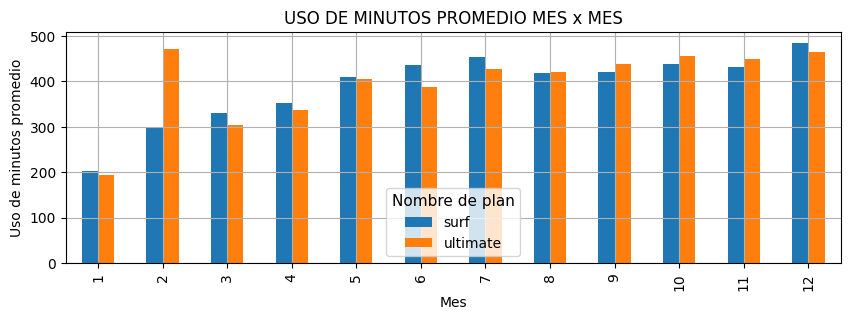

In [49]:
    # Graficando 
min_used_mean_pivot.plot(kind='bar',
                         title='USO DE MINUTOS PROMEDIO MES x MES',
                         xlabel='Mes',
                         ylabel='Uso de minutos promedio',
                         grid=True, figsize=[10,3])

plt.legend(
    title='Nombre de plan',
    fontsize=10,
    title_fontsize=11,
    loc='lower center'
)

plt.show()

#### **Número de minutos mensuales que necesitan los usuarios de cada plan**

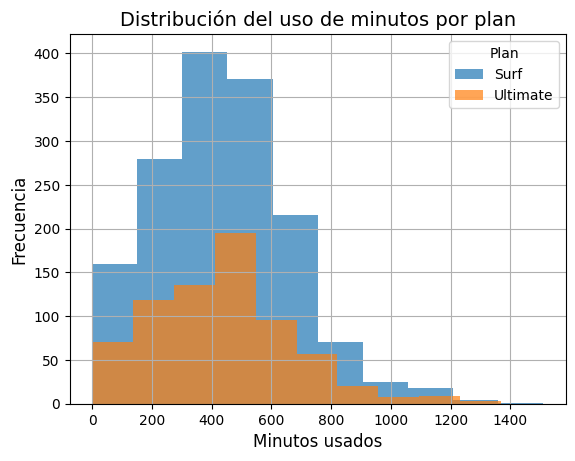

In [50]:
    # Graficando a partir de datos filtrados por 'plan_name'
user_monthly_summary.query('plan_name == "surf"')['min_used'].hist(alpha=0.7, label="Surf")
user_monthly_summary.query('plan_name == "ultimate"')['min_used'].hist(alpha=0.7, label="Ultimate")
    # Formateando gráfico
plt.title("Distribución del uso de minutos por plan", fontsize=14)
plt.xlabel("Minutos usados", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.legend(title="Plan", fontsize=10)

plt.show()

In [51]:
# Calcula la media y la varianza de el uso de minutos mensual de llamadas.
print(">>> Medias de el uso de minutos mensual para cada plan:")
display(min_used_mean.groupby('plan_name').agg(min_used_mean = ('min_used','mean')))

# Varianza de la duración mensual de llamadas para cada plan.
surf_var = np.var(min_used_mean.query('plan_name == "surf"')['min_used'])
ultimate_var = np.var(min_used_mean.query('plan_name == "ultimate"')['min_used'])

min_used_var = pd.DataFrame({
    'plan_name':['surf', 'ultimate'],
    'min_used_var':[surf_var, ultimate_var]
})
# calculando desviación estándar
min_used_var['min_used_std'] = np.sqrt(min_used_var['min_used_var'])

print(">>> Varianzas de el uso de minutos mensual para cada plan:")
display(min_used_var)

>>> Medias de el uso de minutos mensual para cada plan:


,min_used_mean
plan_name,
surf,389.656218
ultimate,396.138568


>>> Varianzas de el uso de minutos mensual para cada plan:


,plan_name,min_used_var,min_used_std
0,surf,5843.400884,76.442141
1,ultimate,6085.246960,78.007993


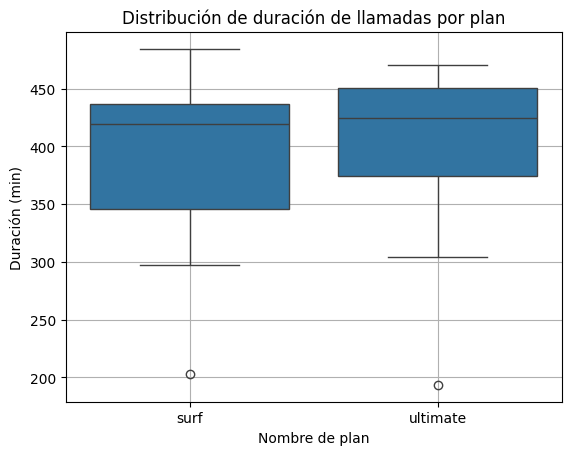

In [52]:
# Traza un diagrama de caja para visualizar la distribución de el uso de minutos mensual
sns.boxplot(x='plan_name', y='min_used', data=min_used_mean)

    # Formateando
plt.title("Distribución de duración de llamadas por plan")
plt.ylabel('Duración (min)')
plt.xlabel('Nombre de plan')
plt.grid()
plt.show()

#### **Análisis de llamadas por plan:**


>**1. Uso de minutos promedio por mes:**  
>  
>- Se observa que los usuarios de ambos planes presentan promedios mensuales de minutos muy similares a lo largo de los 12 meses, con excepción de febrero, donde el plan Ultimate registró un consumo considerablemente mayor.  
>  
>- El promedio mensual de minutos por usuario muestra una tendencia ascendente con el paso de los meses.  

>**2. Distribución del uso de minutos por plan:**  
>  
>- Hay más usuarios en el plan Surf que en el plan Ultimate.  
>  
>- En el plan Surf, el uso mensual de minutos por cliente se concentra principalmente entre 300 y 600 minutos.  
>  
>- En el plan Ultimate, el rango más frecuente de uso mensual por cliente está entre 410 y 550 minutos.  

>**3. Media y varianza del uso mensual de minutos en llamadas:**  
>  
>- El promedio de minutos utilizados por los usuarios es muy similar en ambos planes:  
>  
> Surf: 389.65 minutos / Ultimate: 396.13 minutos  
>  
>- La varianza del uso de minutos también es alta en ambos planes:  
>  
> Surf: 5843.4 / Ultimate: 6085.24  

>**4. Identificación de valores atípicos (outliers):**  
>  
>- El diagrama de caja revela la presencia de un valor atípico en ambos planes, correspondiente al mes de enero.  


### ✉️ **Mensajes**

#### **Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan**

In [53]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
messages_used_mean_month = (
    user_monthly_summary
    .groupby(by=['plan_name', 'month'])
    .agg(messages_used_mean=('messages_used','mean'))
    .reset_index()
)
# Crando pivot table
messages_used_mean_month_pivot = (
    messages_used_mean_month
    .pivot_table(
        index='month',
        columns='plan_name',
        values='messages_used_mean'
    )
)

display(messages_used_mean_month_pivot)


plan_name,surf,ultimate
month,,
1,10.500000,15.500000
2,12.000000,23.166667
3,15.260870,20.250000
4,17.400000,22.047619
5,24.386667,32.103448
6,25.281250,30.533333
7,27.025000,32.830508
8,28.855346,38.478873
9,30.376963,37.895349


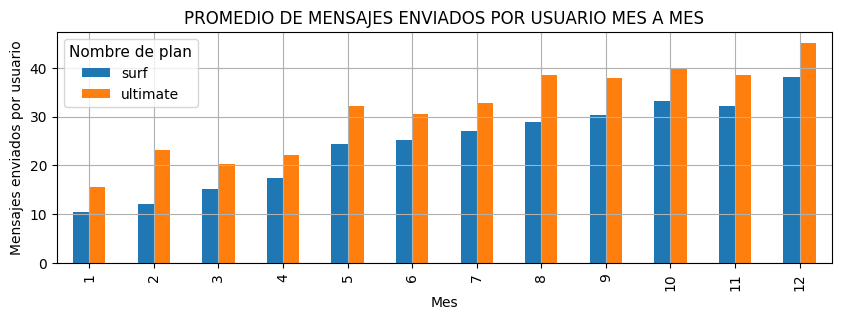

In [54]:
# Graficando 
messages_used_mean_month_pivot.plot(kind='bar',
                                    title='PROMEDIO DE MENSAJES ENVIADOS POR USUARIO MES A MES',
                                    xlabel='Mes', ylabel='Mensajes enviados por usuario',
                                    grid=True, figsize=[10,3])

plt.legend(
    title='Nombre de plan',
    fontsize=10,
    title_fontsize=11
)

plt.show()

#### **Compara el número de mensajes mensuales que necesitan los usuarios de cada plan.**

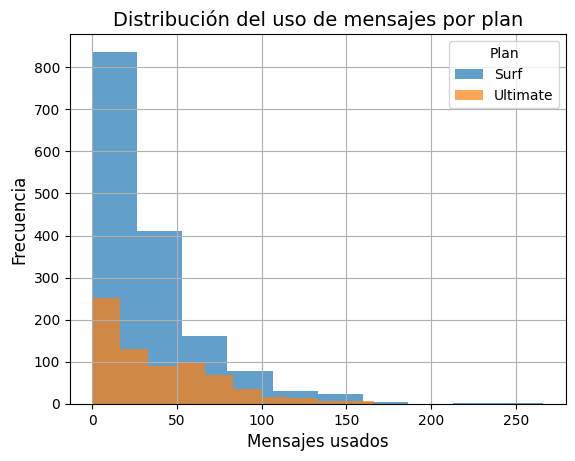

In [55]:
# Graficando histograma
user_monthly_summary.query('plan_name == "surf"')['messages_used'].hist(alpha=0.7, label="Surf")
user_monthly_summary.query('plan_name == "ultimate"')['messages_used'].hist(alpha=0.7, label="Ultimate")

plt.title("Distribución del uso de mensajes por plan", fontsize=14)
plt.xlabel("Mensajes usados", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.legend(title="Plan", fontsize=10)

plt.show()

#### **Media y varianza de mensajes usados por usuario mensual.**

In [56]:
# Calcula la media y la varianza de mensajes usados por usuario mensual.
    # Calculando la media de los mensajes usados por usuario mensual para cada plan.
messages_used_mean = (
    user_monthly_summary
    .groupby(by='plan_name', as_index=False)
    .agg(messages_used_mean=('messages_used', 'mean'))
)

print(">>> Medias de mensajes usados por usuario mensual para cada plan:")
display(messages_used_mean)

# Varianza de los mensajes usados por usuario mensual para cada plan.
surf_messages_used_var = np.var(user_monthly_summary.query('plan_name == "surf"')['messages_used'])
ultimate_messages_used_var = np.var(user_monthly_summary.query('plan_name == "ultimate"')['messages_used'])

# Creando dataframe para mostrar resultados
messages_used_var = pd.DataFrame({
    'plan_name':['surf', 'ultimate'],
    'messages_used_var':[surf_messages_used_var, ultimate_messages_used_var]
})
# Calculando desviación estándar
messages_used_var['messages_used_std'] = np.sqrt(messages_used_var['messages_used_var'])

print(">>> Varianzas de mensajes usados por usuario mensual para cada plan:")
display(messages_used_var)


>>> Medias de mensajes usados por usuario mensual para cada plan:


,plan_name,messages_used_mean
0,surf,30.897735
1,ultimate,37.725105


>>> Varianzas de mensajes usados por usuario mensual para cada plan:


,plan_name,messages_used_var,messages_used_std
0,surf,1131.216726,33.633565
1,ultimate,1208.446172,34.762712


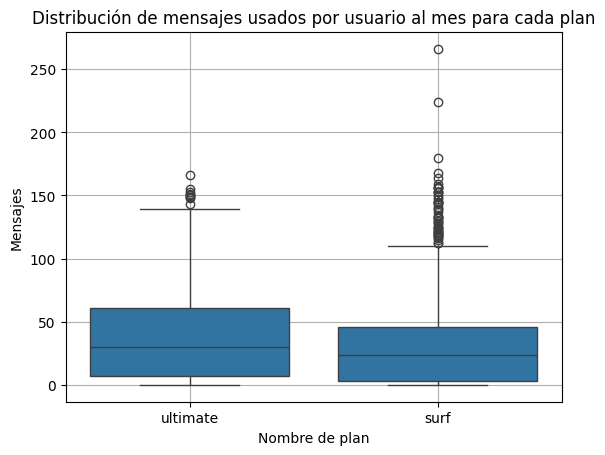

In [57]:
# Traza un diagrama de caja para visualizar la distribución de los mensajes usados por usuario mensual para cada plan.
sns.boxplot(x='plan_name', y='messages_used', data=user_monthly_summary)

    # Formateando
plt.title("Distribución de mensajes usados por usuario al mes para cada plan")
plt.ylabel('Mensajes')
plt.xlabel('Nombre de plan')
plt.grid()
plt.show()

#### **Análisis de mensajes enviados por usuario:**


>**1. Promedio de mensajes enviados mes a mes:**
>
>- La cantidad promedio de mensajes enviados por usuario sigue una tendencia ascendente a lo largo del año.
>
>- En todos los meses, los usuarios del plan Ultimate enviaron más mensajes en promedio que los del plan Surf.

>**2. Distribución del uso de mensajes mensuales por usuario:**
>
>- Se observa una gran diferencia en la cantidad de mensajes enviados por los usuarios del plan surf pero, como ya vimos, esto se debe a que existen muchos mas usuarios de este plan.
>
>- En promedio, los usuarios del plan Ultimate envían más mensajes.
>
>- En el plan Surf, el número más común de mensajes enviados por usuario al mes está entre 0 y 25.
>
>- En el plan Ultimate, el rango más frecuente de mensajes mensuales por usuario es de 0 a aproximadamente 20.

>**3. Media y varianza del uso de mensajes mensuales:**
>
>- En promedio, los usuarios del plan Ultimate envían más mensajes que los del plan Surf:
>
>Surf: 30.90 mensajes / Ultimate: 37.73 mensajes
>
>- La varianza del uso de mensajes mensuales es similar en ambos planes, aunque con una ligera diferencia:
>
>Surf: 1131.21 / Ultimate: 1208.44

>**4. Identificación de valores atípicos (outliers):**
>
>- En ambos planes se detectaron valores atípicos en la cantidad de mensajes enviados.
>
>- En el plan Surf, los outliers son significativamente más numerosos, lo que podría estar afectando de manera importante el promedio calculado.
>
>- Es preciso realizar un análisis adicional excluyendo estos valores para evaluar su impacto en la distribución y en los resultados generales.

### 🌐 **Internet**

#### **Compara la cantidad de tráfico de Internet consumido al mes por usuarios por plan.**


plan_name,surf,ultimate
month,,
1,4874.860000,6918.092500
2,12178.843333,17884.958333
3,13345.440000,18321.518333
4,11984.203000,16121.654762
5,14201.487067,16624.482414
6,15308.450937,15920.383333
7,16785.430500,16344.744407
8,16870.108365,17814.720141
9,16441.597801,16969.869535


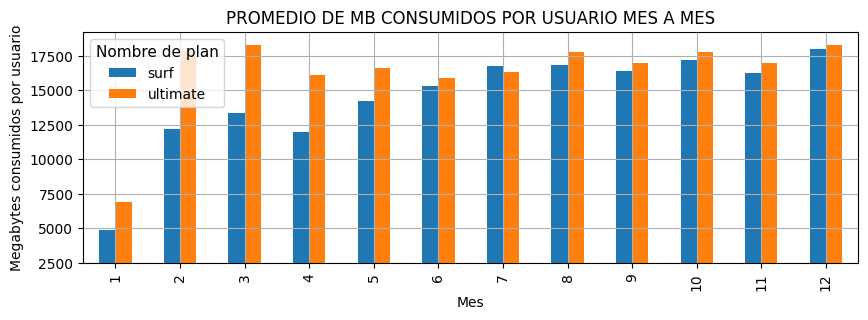

In [58]:
# Compara la cantidad de tráfico de Internet consumido al mes por usuarios por plan.
mb_used_mean_month = (
    user_monthly_summary
    .groupby(by=['plan_name', 'month'])
    .agg(mb_used_mean = ('mb_used','mean'))
    .reset_index()
)
mb_used_mean_month_pivot = (
    mb_used_mean_month
    .pivot_table(
        index='month',
        columns='plan_name',
        values='mb_used_mean'
    )
)
display(mb_used_mean_month_pivot)

    # Graficando 
mb_used_mean_month_pivot.plot(kind='bar', 
                               title='PROMEDIO DE MB CONSUMIDOS POR USUARIO MES A MES', 
                               xlabel='Mes', ylabel='Megabytes consumidos por usuario', 
                               grid=True, figsize=[10,3],
                               ylim=(2500, None))

plt.legend(
    title='Nombre de plan',
    fontsize=10,
    title_fontsize=11
)

plt.show()

#### **Compara la cantidad de tráfico de Internet consumido al mes por usuarios por plan.**

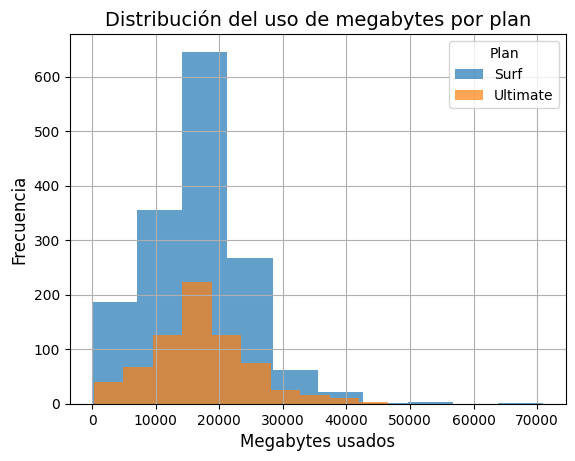

In [59]:
# Compara la cantidad de tráfico de Internet consumido al mes por usuarios por plan. Traza un histograma.
    # Graficando
user_monthly_summary.query('plan_name == "surf"')['mb_used'].hist(alpha=0.7, label="Surf")
user_monthly_summary.query('plan_name == "ultimate"')['mb_used'].hist(alpha=0.7, label="Ultimate")

plt.title("Distribución del uso de megabytes por plan", fontsize=14)
plt.xlabel("Megabytes usados", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.legend(title="Plan", fontsize=10)

plt.show()

#### **Media y varianza de megabytes usados por usuario mensual.**

In [60]:
# Calcula la media y la varianza de megabytes usados por usuario mensual.
    # Calculando la media de los megabytes usados por usuario mensual para cada plan.
mb_used_mean = (
    user_monthly_summary
    .groupby(by='plan_name', as_index=False)
    .agg(mb_used_mean=('mb_used', 'mean'))
)

print(">>> Medias de megabytes usados por usuario mensual para cada plan:")
display(mb_used_mean)

    # Varianza de los megabytes usados por usuario mensual para cada plan.
surf_mb_used_var = np.var(user_monthly_summary.query('plan_name == "surf"')['mb_used'])
ultimate_mb_used_var = np.var(user_monthly_summary.query('plan_name == "ultimate"')['mb_used'])

mb_used_var = pd.DataFrame({
    'plan_name':['surf', 'ultimate'],
    'mb_used_var':[surf_mb_used_var, ultimate_mb_used_var]
})
    # Calculando desviación estándar
mb_used_var['mb_used_std'] = np.sqrt(mb_used_var['mb_used_var'])

print(">>> Varianzas de megabytes usados por usuario mensual para cada plan:")
display(mb_used_var)

>>> Medias de megabytes usados por usuario mensual para cada plan:


,plan_name,mb_used_mean
0,surf,16505.727372
1,ultimate,17278.003731


>>> Varianzas de megabytes usados por usuario mensual para cada plan:


,plan_name,mb_used_var,mb_used_std
0,surf,6.154836e+07,7845.276084
1,ultimate,6.012780e+07,7754.211704


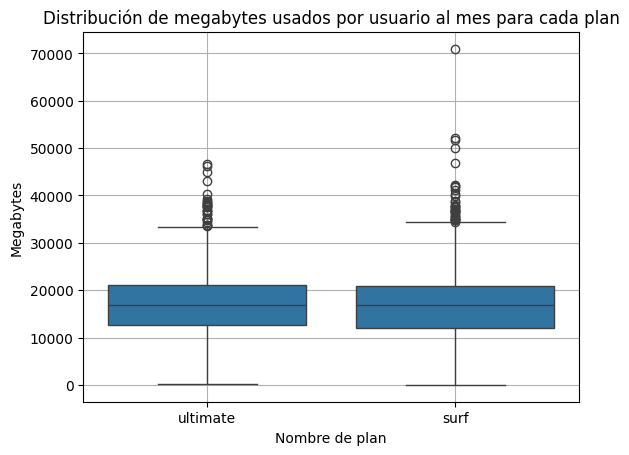

In [61]:
# Traza un diagrama de caja para visualizar la distribución de los megabytes usados por usuario mensual para cada plan.
sns.boxplot(x='plan_name', y='mb_used', data=user_monthly_summary)

    # Formateando
plt.title("Distribución de megabytes usados por usuario al mes para cada plan")
plt.ylabel('Megabytes')
plt.xlabel('Nombre de plan')
plt.grid()
plt.show()

#### **Análisis de consumo de internet por usuario:**

>**1. Consumo promedio de megabytes mes a mes:**
>
>- Durante los primeros cinco meses del año, el consumo promedio de datos fue significativamente mayor en el plan Ultimate en comparación con el plan Surf.
>
>- A partir del sexto mes, los promedios de consumo se equilibraron entre ambos planes.
>
>- En general, los usuarios del plan Ultimate consumen más megabytes en promedio, excepto en julio, cuando el consumo del plan Surf superó al de Ultimate.

>**2. Distribución del consumo mensual de megabytes por usuario:**
>
>- En promedio, los usuarios del plan Ultimate consumen más datos mes a mes.
>
>- En el plan Surf, el consumo mensual más frecuente se encuentra entre 14,000 y 21,000 MB.
>
>- En el plan Ultimate, el rango más común de consumo mensual está entre 14,000 y 19,000 MB.

>**3. Media y varianza del consumo mensual de datos:**
>
>- En promedio, los usuarios del plan Ultimate consumen más datos que los del plan Surf:
>
>Surf: 16,505.73 MB / Ultimate: 17,278.00 MB
>
>- La varianza del consumo de megabytes es similar en ambos planes:
>
>Surf: 6.15 × 10⁷ / Ultimate: 6.01 × 10⁷

>**4. Identificación de valores atípicos (outliers):**
>
>- Se detectaron valores atípicos en ambos planes.
>
>- En el plan Surf, hay un outlier particularmente alejado de la tendencia general, lo que podría estar afectando los cálculos del consumo promedio.
>
>- Se recomienda realizar un análisis adicional excluyendo estos valores para evaluar su impacto en los resultados.

### 💵 **Ingreso**

#### **Compara los ingresos mensuales para cada plan**

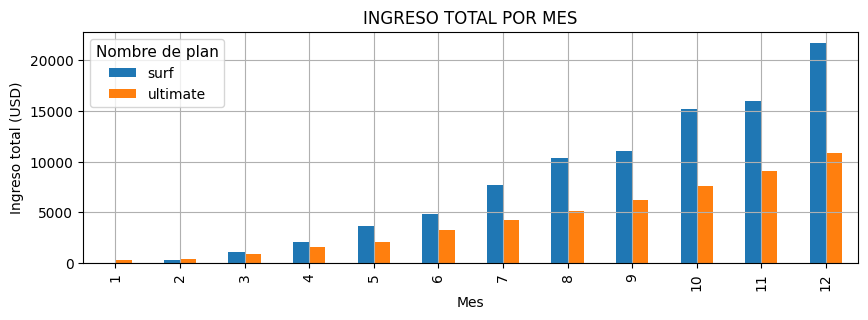

In [62]:
# Compara los ingresos mensuales para cada plan.
income_month = (
    user_monthly_summary
    .groupby(by=['plan_name', 'month'])
    .agg(total_income = ('total_pay','sum'))
    .reset_index()
)

income_month_pivot = income_month.pivot_table(index='month', columns='plan_name', values='total_income')

    # Graficando 
income_month_pivot.plot(
    kind='bar',
    title='INGRESO TOTAL POR MES',
    xlabel='Mes',
    ylabel='Ingreso total (USD)',
    grid=True, figsize=[10,3]
)

plt.legend(
    title='Nombre de plan',
    fontsize=10,
    title_fontsize=11
)

plt.show()


#### **Compara los promedios de ingresos mensuales por cliente para cada plan**

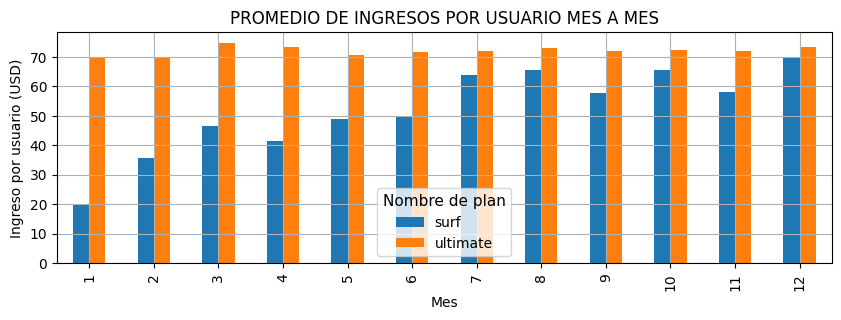

In [63]:
# Compara los promedios de ingresos mensuales por cliente para cada plan.
income_mean_month = (
    user_monthly_summary
    .groupby(by=['plan_name', 'month'])
    .agg(mean_income = ('total_pay','mean'))
    .reset_index()
)
# Creando pivot table
income_mean_month_pivot = (
    income_mean_month.
    pivot_table(
        index='month',
        columns='plan_name',
        values='mean_income'
    )
)
    # Graficando 
income_mean_month_pivot.plot(
    kind='bar',
    title='PROMEDIO DE INGRESOS POR USUARIO MES A MES',
    xlabel='Mes',
    ylabel='Ingreso por usuario (USD)',
    grid=True,
    figsize=[10,3]
)

plt.legend(
    title='Nombre de plan',
    fontsize=10,
    title_fontsize=11,
    loc='lower center'
)

plt.show()

#### **Compara el ingreso al mes por usuarios por plan**

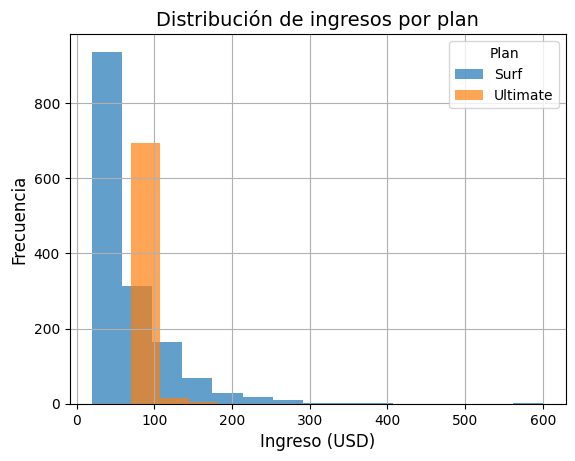

In [64]:
# Compara el ingreso al mes por usuarios por plan. Traza un histograma.
    # Graficando
user_monthly_summary.query('plan_name == "surf"')['total_pay'].hist(alpha=0.7, label="Surf", bins=15)
user_monthly_summary.query('plan_name == "ultimate"')['total_pay'].hist(alpha=0.7, label="Ultimate", bins=3)

plt.title("Distribución de ingresos por plan", fontsize=14)
plt.xlabel("Ingreso (USD)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.legend(title="Plan", fontsize=10)
plt.yticks()

plt.show()

#### **Promedio y varianza de los datos calculados para cada plan**

In [65]:
# Calcula la media y la varianza de ingreso por usuario mensual.
    # Calculando la media de los ingreso por usuario mensual para cada plan.
income_mean = (
    user_monthly_summary
    .groupby(by='plan_name', as_index=False)
    .agg(income_mean=('total_pay', 'mean'))
)

print(">>> Medias de ingresos por usuario mensual para cada plan:")
display(income_mean)

    # Varianza de los ingresos por usuario mensual para cada plan.
surf_income_var = np.var(user_monthly_summary.query('plan_name == "surf"')['total_pay'])
ultimate_income_var = np.var(user_monthly_summary.query('plan_name == "ultimate"')['total_pay'])

income_var = pd.DataFrame({
    'plan_name':['surf', 'ultimate'],
    'income_var':[surf_income_var, ultimate_income_var]
})
income_var['income_std'] = np.sqrt(income_var['income_var'])

print(">>> Varianzas de ingresos por usuario mensual para cada plan:")
display(income_var)

>>> Medias de ingresos por usuario mensual para cada plan:


,plan_name,income_mean
0,surf,60.824544
1,ultimate,72.336606


>>> Varianzas de ingresos por usuario mensual para cada plan:


,plan_name,income_var,income_std
0,surf,2983.718722,54.623426
1,ultimate,135.698758,11.648981


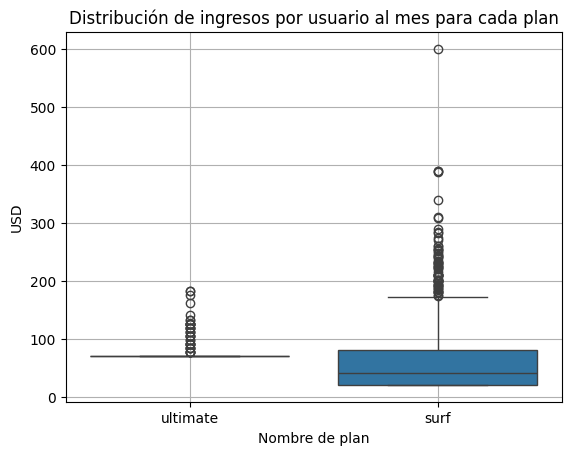

In [66]:
# Traza un diagrama de caja para visualizar la distribución de los ingresos por usuario mensual para cada plan.
sns.boxplot(x='plan_name', y='total_pay', data=user_monthly_summary)

    # Formateando
plt.title("Distribución de ingresos por usuario al mes para cada plan")
plt.ylabel('USD')
plt.xlabel('Nombre de plan')
plt.grid()
plt.show()

In [67]:
print("Número de pagos en plan ultimate:")
print(len(user_monthly_summary.query("plan_name == 'ultimate'")))
print("Número de pagos en plan ultimate diferentes a $70:")
print(len(user_monthly_summary.query("plan_name == 'ultimate' and total_pay != 70")))

Número de pagos en plan ultimate:
713
Número de pagos en plan ultimate diferentes a $70:
40


#### **Análisis de ingresos para la empresa:**


>**1. Ingresos totales mes a mes por plan:**
>
>- Los ingresos totales han seguido una tendencia ascendente a lo largo del año.
>
>- El plan Surf genera significativamente más ingresos para la empresa que el plan Ultimate, debido a la mayor cantidad de usuarios en este plan.

>**2. Ingresos promedio por usuario mes a mes:**
>
>- A nivel individual, el plan Ultimate genera más ingresos por usuario en comparación con el plan Surf.
>
>- Los ingresos promedio por usuario en el plan Ultimate se mantienen estables durante todo el año.
>
>- En el plan Surf, se observa una tendencia ascendente en los ingresos promedio por usuario, hasta casi igualar los del plan Ultimate. Esto sugiere que en los próximos meses el plan Surf podría superar a Ultimate en este parámetro.

>**3. Distribución del ingreso mensual por usuario:**
>
>- En el plan Surf, el ingreso mensual más común por usuario se encuentra entre $20 y $60 USD.
>
>- En el plan Ultimate, el rango más frecuente de ingreso mensual por usuario está entre $70 y $105 USD.
>
>- A lo largo del año, los clientes con el plan Ultimate han generado más ingresos por usuario para la empresa.

>**4. Media y varianza del ingreso mensual por usuario:**
>
>- En promedio, los usuarios del plan Ultimate generan más ingresos que los del plan Surf:

>Surf: $60.82 USD / Ultimate: $72.34 USD
>
>- La varianza en los ingresos mensuales por usuario es considerablemente mayor en el plan Surf, lo que indica una mayor dispersión en los valores:

>Surf: 2,983.72 / Ultimate: 135.70
>
>- Esta diferencia sugiere que mientras los ingresos por usuario en Ultimate son más uniformes, en Surf los ingresos por usuario varían mucho más entre clientes.

>**5. Identificación de valores atípicos (outliers):**
>
>- Existen valores atípicos en ambos planes.
>
>- En el plan Ultimate, la caja en el diagrama de caja es prácticamente imperceptible. Esto se debe a que en la mayoría de los casos, la tarifa mensual es de $70 USD, con pocas variaciones.
>
>- De las 713 facturas del plan Ultimate, solo en 40 ocasiones la tarifa fue diferente a $70 USD. Por esta razón, aunque los valores considerados outliers no se alejan mucho de $70, aparecen como atípicos debido a la baja dispersión de los datos.
>
>- En el plan Surf, aunque la tarifa base es de $20 USD, muy frecuentemente se supera este valor. Sin embargo, también se presentan varios outliers en los ingresos por usuario.

## ⚖️**Prueba las hipótesis estadísticas** (REVISAR)
---

### **Prueba**1️⃣

⚪**Hipótesis Nula:**

*"No hay diferencia entre los ingresos promedio procedentes de los usuarios de los planes Ultimate y Surf"*

🟢**Hipótesis alternativa:**

*"Los ingresos promedio procedentes de los usuarios del plan Ultimate son diferentes a los procedentes de los usuarios del plan Surf"*

In [68]:
# Prueba las hipótesis
    # Filtrando datos por plan
surf_income = ( # Ingresos por usuario del plan surf
    user_monthly_summary
    .query('plan_name == "surf"')
    .groupby(by=['user_id','month'])
    .agg({'total_pay':'mean'})
    .reset_index()
) 

ultimate_income = ( # Ingresos por usuario del plan ultimate
    user_monthly_summary
    .query('plan_name == "ultimate"')
    .groupby(by=['user_id','month'])
    .agg({'total_pay':'mean'})
    .reset_index()
) 


In [69]:
    # Estableciendo valor de significancia estadística
alpha = 0.05

    # Realizando prueba de hipótesis con ttest_ind() debido a que se trata de población vs población
resultado = stats.ttest_ind(ultimate_income['total_pay'], surf_income['total_pay'], equal_var=False)

    # Evaluando p_value
print(f"p_value: {resultado.pvalue}")

if resultado.pvalue < alpha:
    print('RESULTADO: Se rechaza la hipótesis nula. Existe diferencia significativa.')
else:
    print('RESULTADO: No se puede rechazar la hipótesis nula.')


p_value: 4.747242597268979e-15
RESULTADO: Se rechaza la hipótesis nula. Existe diferencia significativa.


### **Prueba**2️⃣

⚪**Hipótesis Nula:**

*"No hay diferencia entre los ingresos promedio de los usuarios del área NY-NJ y los usuarios de otras regiones"*

🟢**Hipótesis alternativa:**

*"Los ingresos promedio procedentes de los usuarios del área NY-NJ son diferentes a los procedentes de otras regiones"*

In [79]:
# Prueba las hipótesis
user_mean_income = ( # 
    user_monthly_summary
    .groupby(by=['user_id','month'])
    .agg({'total_pay':'mean'})
    .reset_index()
)

user_mean_income_zone = ( # Merge de ingreso promedio por cliente con zona
    user_mean_income
    .merge(users[['user_id', 'zone']], on='user_id')
) 

    # Filtrando datos por zona
nynj_income = user_mean_income_zone.query("zone == 'NY-NJ-PA MSA'") # Ingreso promedio por usuario en la zona NY-NJ-PA MSA
not_nynj_income = user_mean_income_zone.query("zone != 'NY-NJ-PA MSA'") # Ingreso promedio por usuario en otras zonas


In [80]:
    # Estableciendo valor de significancia estadística
alpha = 0.05

    # Realizando prueba de hipótesis con ttest_ind() debido a que se trata de población vs población
resultado = stats.ttest_ind(nynj_income['total_pay'], not_nynj_income['total_pay'], equal_var=False)

    # Evaluando p_value
print(f"p_value: {resultado.pvalue}")

if resultado.pvalue < alpha:
    print('RESULTADO: Se rechaza la hipótesis nula.')
else:
    print('RESULTADO: No se puede rechazar la hipótesis nula.')


p_value: 0.014993669733508389
RESULTADO: Se rechaza la hipótesis nula.


### 🧠 **Conclusiones:**

>- El plan Surf genera significativamente más ingresos para la empresa que el plan Ultimate, esto puede ser debido a la mayor cantidad de usuarios en este plan.
>
>- A nivel individual, el plan Ultimate genera más ingresos por usuario en comparación con el plan Surf.
>
>- En el plan Surf, se observa una tendencia ascendente en los ingresos promedio por usuario, hasta casi igualar los del plan Ultimate. Esto sugiere que en los próximos meses el plan Surf podría superar a Ultimate en este parámetro.
>
>- En promedio, los usuarios del plan Ultimate generan más ingresos que los del plan Surf [Ultimate: $72.34 USD / Surf: $60.82 USD].
>
>- La varianza en los ingresos mensuales por usuario es considerablemente mayor en el plan Surf, lo que indica una mayor dispersión en los valores.
>
>- Esta diferencia sugiere que mientras los ingresos por usuario en Ultimate son más uniformes, en Surf los ingresos por usuario varían mucho más entre clientes.
>
>- Se concluye que los usuarios del plan Ultimate rara vez superan los servicios incluidos en su cuota base, mientras que los del plan Surf lo hacen con frecuencia.
>
>- Después de realizar una prueba de hipótesis, se concluye que la hipótesis nula que indica que *"No hay diferencia entre los ingresos promedio procedentes de los usuarios de los planes Ultimate y Surf"* debe ser rechazada y por lo tanto si hay diferencia entre los ingresos promedio procedentes de los usuarios de los planes Ultimate y Surf.
>
>- Después de realizar una prueba de hipótesis, se concluye que la hipótesis nula que indica que *"No hay diferencia entre los ingresos promedio de los usuarios del área NY-NJ y los usuarios de otras regiones"* debe ser rechazada y por lo tanto lo usuarios de esta zona tienen un comportamiento diferente al resto.